In [1]:
import torch
import torchvision
import math
import decord

decord.bridge.set_bridge('torch')

In [2]:
import matplotlib.pyplot as plt

In [3]:
video_path = "/home/bigboy/1-workdir/1-youtube-scraper/test_ed.mp4"

In [4]:
vr = decord.VideoReader(video_path, decord.gpu(0))

In [5]:
avg_fps = math.ceil(vr.get_avg_fps())
max_nframes = len(vr)
max_frames_per_batch = 100
batches = list(torch.arange(0, max_nframes, avg_fps).split(max_frames_per_batch))

In [6]:
scaler = 0.25
resize = torchvision.transforms.Resize((int(1080*scaler), int(1920*scaler)))

In [7]:
for batch in batches:
    frame_batch = vr.get_batch(batch)
    break

In [8]:
frame_batch = frame_batch.permute(0, 3, 1, 2)

In [9]:
resize_batch = resize(frame_batch)

In [10]:
sample_frame = resize_batch[10].permute(1,2,0).cpu().numpy()

In [11]:
from facemeshdetector import FaceMeshDetector

In [12]:
FACE_DETECTOR = FaceMeshDetector(maxFaces=2)

In [13]:
_, faces = FACE_DETECTOR.findFaceMesh(sample_frame)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


(0.0, 1.0, 1.0, 0.0)

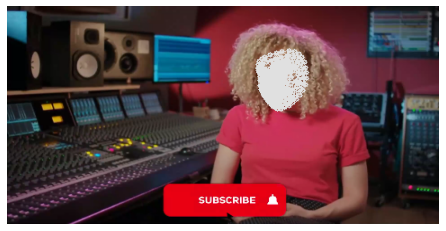

In [14]:
fig, ax = plt.subplots(1)
fig.subplots_adjust(left=0, right=1)
ax.imshow(sample_frame, aspect="auto", extent=(0, 1, 1, 0))
ax.axis("tight")
ax.axis("off")
